In [1]:
%load_ext autoreload
%autoreload 2

In [29]:
import sys
sys.path.append('../')
from dataset import BoundingBox, Object, Relation, RelationalDataset, draw_scene_graph

class RelationalDataset3O(RelationalDataset):
    path = '/viscam/projects/ns-diffusion/dataset/clevr_rel_3objs_old.npz'
    image_path = '/viscam/projects/ns-diffusion/dataset/clevr_rel_3objs_imgs/1.npz'

    def __init__(self, uncond_image_type="original", center_crop=True, pick_one_relation=False):
        super().__init__(self.path, uncond_image_type=uncond_image_type, center_crop=center_crop, pick_one_relation=pick_one_relation, image_path=self.image_path)



In [30]:
dataset2 = RelationalDataset3O()

import matplotlib.pyplot as plt
from numpy.random import randint as rand

Loading images from image_path


In [47]:
dataset4 = RelationalDataset(data_path="nothing", generated_object_num=4)


Empty images


before: tensor([[4, 1, 2, 1, 3, 1, 2, 0, 1],
        [4, 1, 2, 1, 3, 1, 2, 0, 2],
        [4, 1, 2, 1, 7, 1, 0, 0, 1],
        [4, 1, 2, 1, 7, 1, 0, 0, 3],
        [4, 1, 2, 1, 2, 1, 2, 0, 0],
        [4, 1, 2, 1, 2, 1, 2, 0, 3],
        [3, 1, 2, 0, 4, 1, 2, 1, 0],
        [3, 1, 2, 0, 4, 1, 2, 1, 3],
        [3, 1, 2, 0, 7, 1, 0, 0, 3],
        [3, 1, 2, 0, 2, 1, 2, 0, 0],
        [3, 1, 2, 0, 2, 1, 2, 0, 3],
        [7, 1, 0, 0, 4, 1, 2, 1, 0],
        [7, 1, 0, 0, 4, 1, 2, 1, 2],
        [7, 1, 0, 0, 3, 1, 2, 0, 2],
        [7, 1, 0, 0, 2, 1, 2, 0, 0],
        [7, 1, 0, 0, 2, 1, 2, 0, 3],
        [2, 1, 2, 0, 4, 1, 2, 1, 1],
        [2, 1, 2, 0, 4, 1, 2, 1, 2],
        [2, 1, 2, 0, 3, 1, 2, 0, 1],
        [2, 1, 2, 0, 3, 1, 2, 0, 2],
        [2, 1, 2, 0, 7, 1, 0, 0, 1],
        [2, 1, 2, 0, 7, 1, 0, 0, 2]]) tensor([[0, 1],
        [0, 1],
        [0, 2],
        [0, 2],
        [0, 3],
        [0, 3],
        [1, 0],
        [1, 0],
        [1, 2],
        [1, 3],
        [1, 3],
 

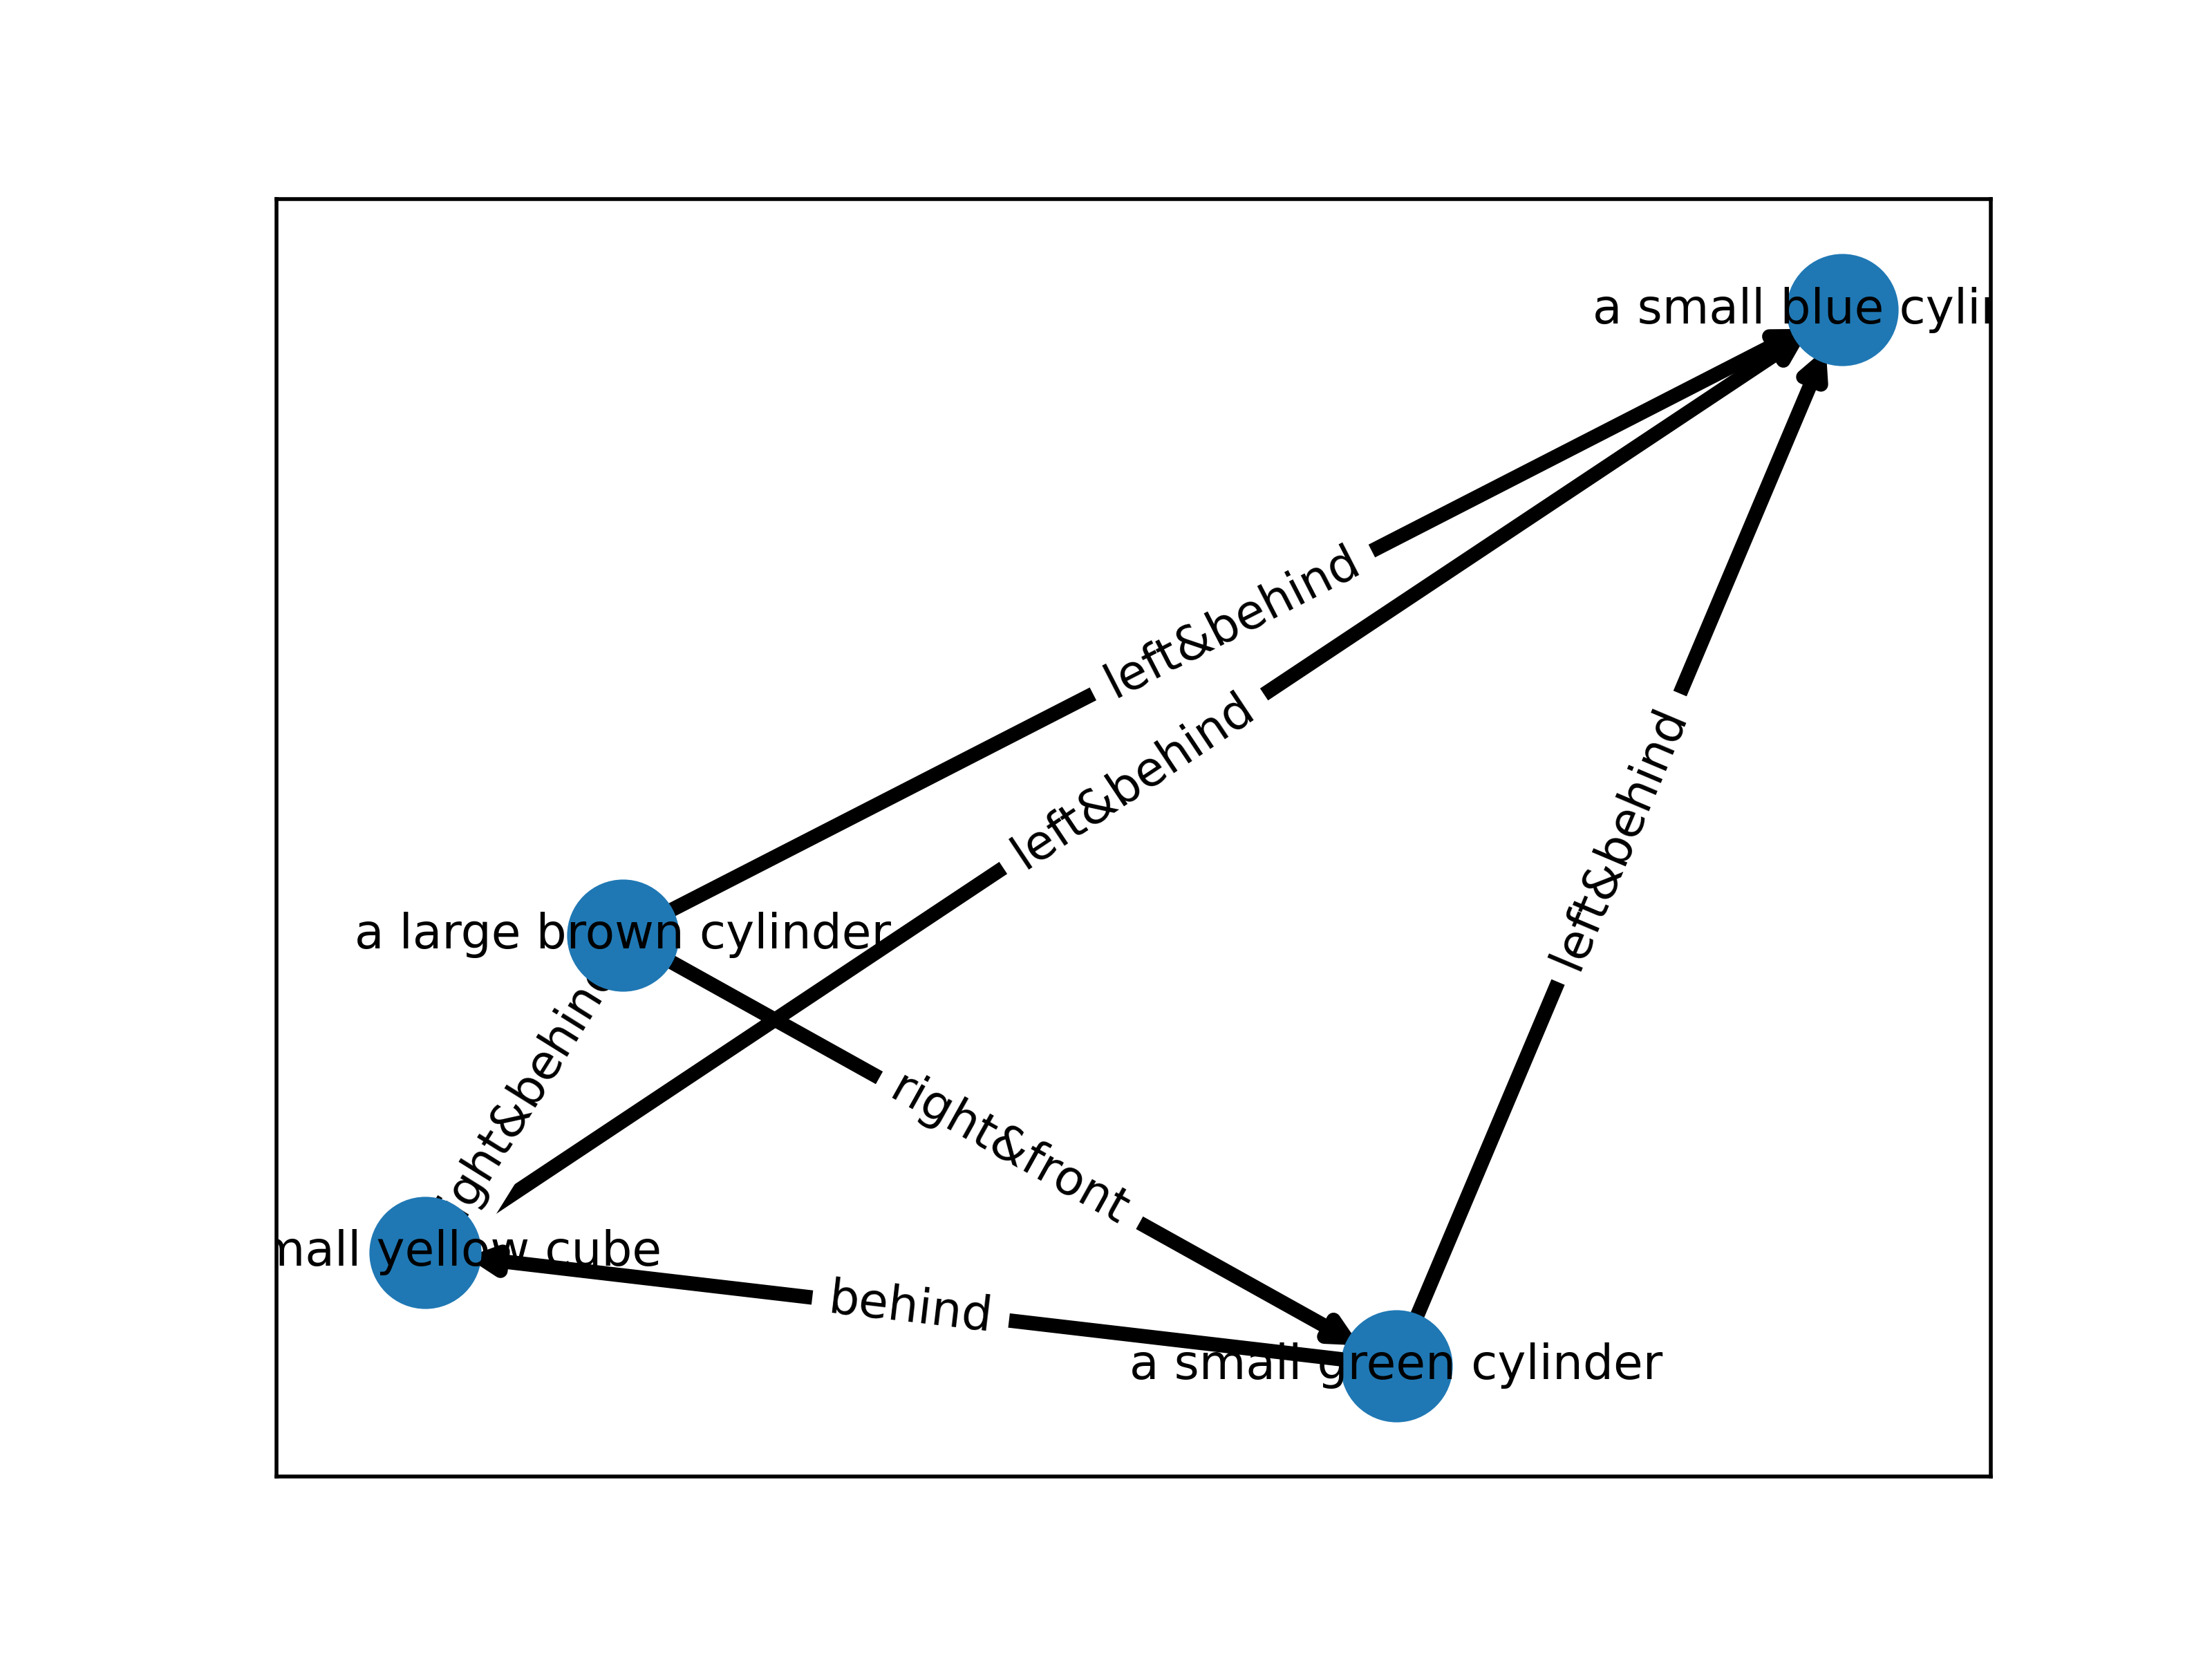

In [49]:
rand_id = 0
clean_image, objects, relations, bboxes, generated_prompt, raw_image, raw_image_tensor, relations_ids = dataset4[rand_id]

draw_scene_graph(objects, relations, relations_ids)

In [4]:
for i in range(100):
    obj = dataset2.objects[i][0]
    print(obj.tensorize())

tensor([3, 0, 1, 1])
tensor([1, 1, 2, 0])
tensor([4, 1, 1, 1])
tensor([0, 0, 2, 1])
tensor([2, 0, 2, 0])
tensor([1, 0, 0, 0])
tensor([7, 0, 0, 1])
tensor([3, 1, 1, 1])
tensor([7, 0, 0, 1])
tensor([7, 0, 0, 1])
tensor([6, 1, 1, 1])
tensor([4, 1, 1, 0])
tensor([7, 1, 1, 0])
tensor([1, 1, 0, 1])
tensor([3, 1, 1, 1])
tensor([0, 0, 2, 0])
tensor([7, 0, 0, 1])
tensor([6, 1, 0, 0])
tensor([1, 1, 1, 1])
tensor([1, 0, 1, 1])
tensor([2, 0, 1, 1])
tensor([4, 0, 0, 1])
tensor([3, 1, 2, 0])
tensor([0, 1, 0, 1])
tensor([1, 0, 2, 1])
tensor([1, 0, 0, 0])
tensor([2, 1, 0, 0])
tensor([1, 0, 1, 1])
tensor([2, 1, 0, 1])
tensor([0, 0, 1, 1])
tensor([3, 1, 0, 1])
tensor([3, 1, 2, 1])
tensor([6, 0, 0, 1])
tensor([7, 1, 1, 1])
tensor([5, 0, 0, 1])
tensor([7, 0, 0, 1])
tensor([0, 1, 0, 0])
tensor([7, 1, 1, 1])
tensor([3, 0, 2, 1])
tensor([4, 0, 2, 0])
tensor([5, 0, 1, 1])
tensor([2, 1, 1, 1])
tensor([0, 1, 2, 0])
tensor([6, 1, 0, 1])
tensor([0, 1, 1, 1])
tensor([5, 1, 2, 1])
tensor([4, 1, 0, 1])
tensor([7, 0,

In [7]:
image0 = dataset2.annotated_images[rand_id]
image1 = dataset2.images[rand_id]
relations = dataset2.relations[rand_id]
objects = dataset2.objects[rand_id]
prompt = dataset2.prompts[rand_id]
bboxes = dataset2.bboxes[rand_id]

[]
[tensor([4, 0, 1, 1])]

[tensor([-0.4766, -0.0078,  0.2734,  0.2891])]


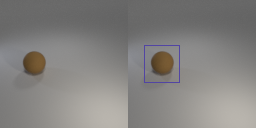

In [6]:
from utils import combine_images
image = combine_images(image1, image0)
print([rel.tensorize() for rel in relations])
print([obj.tensorize() for obj in objects])
print(prompt)
print([bbox.tensorize() for bbox in bboxes])
image

In [10]:
import numpy as np
data = np.load('/viscam/projects/ns-diffusion/dataset/clevr_rel_1obj_imgs/1.npz')